In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
df= pd.read_csv('Survey-1.csv')

In [4]:
df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [5]:
df.shape

(62, 14)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [7]:
df.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [10]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62,NaN,NaN,NaN,31.5,18.0416,1,16.25,31.5,46.75,62
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62,NaN,NaN,NaN,21.129,1.43131,18,20,21,22,26
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62,NaN,NaN,NaN,3.12903,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62,NaN,NaN,NaN,48.5484,12.0809,25,40,50,55,80
Social Networking,62,NaN,NaN,NaN,1.51613,0.844305,0,1,1,2,4


#### 1.1. For this data, construct the following contingency tables (Keep Gender as row variable)
#### 1.1.1. Gender and Major


In [11]:
pd.crosstab(df.Gender, df.Major)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


#### 1.1.2. Gender and Grad Intention

In [12]:
pd.crosstab(df.Gender, df['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


#### 1.1.3. Gender and Employment

In [13]:
pd.crosstab(df.Gender, df['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


#### 1.1.4. Gender and Computer

In [14]:
pd.crosstab(df.Gender, df['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


#### 1.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer thefollowing question:
#### 1.2.1. What is the probability that a randomly selected CMSU student will be male?
#### 1.2.2. What is the probability that a randomly selected CMSU student will be female?

In [15]:
No_of_male = (df['Gender'] =='Male').sum()
print(No_of_male)
No_of_female = (df['Gender'] =='Female').sum()
print(No_of_female)
Total_value =df['Gender'].value_counts().sum()
print(Total_value)

29
33
62


In [16]:
p_male = No_of_male/Total_value

print('The probability that a randomly selected CMSU student will be male',(p_male)*100)

The probability that a randomly selected CMSU student will be male 46.774193548387096


In [17]:
p_female= No_of_female/Total_value

print('The probability that a randomly selected CMSU student will be male',(p_female)*100)

The probability that a randomly selected CMSU student will be male 53.2258064516129


#### 1.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer thefollowing question:
#### 1.3.1. Find the conditional probability of different majors among the male students in CMSU.
#### 1.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [18]:
pd.crosstab(df['Gender'], df['Major'],margins = True,normalize='index')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727,0.000000
Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448
All,0.112903,0.064516,0.177419,0.096774,0.161290,0.112903,0.225806,0.048387


#### 1.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answerthe following question:
#### 1.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.
#### 1.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [19]:
df['Grad Intention'].value_counts()

Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64

In [20]:
df.groupby(['Gender', 'Grad Intention']).size()

Gender  Grad Intention
Female  No                 9
        Undecided         13
        Yes               11
Male    No                 3
        Undecided          9
        Yes               17
dtype: int64

In [21]:
pd.crosstab(df.Gender, df['Grad Intention'],margins = True,normalize='index')

Grad Intention,No,Undecided,Yes
Gender,,,
Female,0.272727,0.393939,0.333333
Male,0.103448,0.310345,0.586207
All,0.193548,0.354839,0.451613


In [22]:
df['Computer'].value_counts()

Laptop     55
Desktop     5
Tablet      2
Name: Computer, dtype: int64

In [23]:
df.groupby(['Gender', 'Computer']).size()

Gender  Computer
Female  Desktop      2
        Laptop      29
        Tablet       2
Male    Desktop      3
        Laptop      26
dtype: int64

In [24]:
pd.crosstab(df.Gender, df['Computer'],margins = True,normalize='index')

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,0.060606,0.878788,0.060606
Male,0.103448,0.896552,0.000000
All,0.080645,0.887097,0.032258


#### 1.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer thefollowing question:
#### 1.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?


In [25]:
df['Employment'].value_counts()

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

In [26]:
No_of_fulltime_emp = (df['Employment'] =='Full-Time').sum()
No_of_fulltime_emp

10

In [27]:
No_male_fulltime_emp = ((df['Employment'] =='Full-Time') & (df['Gender'] =='Male')).sum()
No_male_fulltime_emp

7

In [28]:
df.groupby(['Gender', 'Employment']).size()

Gender  Employment
Female  Full-Time      3
        Part-Time     24
        Unemployed     6
Male    Full-Time      7
        Part-Time     19
        Unemployed     3
dtype: int64

In [29]:
p_of_male_stu =No_of_male/Total_value
print(round((p_of_male_stu), 4)*100)
p_of_fulltime_emp =No_of_fulltime_emp/Total_value
print(round((p_of_fulltime_emp), 4)*100)
p_of_male_fulltime_emp = No_male_fulltime_emp/Total_value
print(round((p_of_male_fulltime_emp), 4)*100)

46.77
16.13
11.29


In [30]:
p = p_of_male_stu+p_of_fulltime_emp-p_of_male_fulltime_emp
print(' The probability that a randomly chosen student is either a male or has full-time employment', p*100 ,'%')

 The probability that a randomly chosen student is either a male or has full-time employment 51.61290322580645 %


#### 1.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring ininternational business or management.

In [32]:
(df['Major'].value_counts())
(df.groupby(['Gender', 'Major']).size())
val_1 = (df['Gender']=='Female').sum()
val_2 = ((df['Gender']=='Female') & (df['Major'] == 'International Business')).sum()
val_3 = ((df['Gender']=='Female') & (df['Major'] == 'Management')).sum()
val_4 = val_2 + val_3
val_4

print('Probability that given a female student is randomly chosen, she is majoring in international business or management',round((val_4/val_1)*100, 2), "%")

Probability that given a female student is randomly chosen, she is majoring in international business or management 24.24 %


#### 1.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecidedstudents are not considered now and the table is a 2x2 table. Do you think the graduate intention andbeing female are independent events?

In [33]:
df[df['Grad Intention'] == 'Undecided'].index
df_cont = df.drop(df[df['Grad Intention'] == 'Undecided'].index)
df_cont.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400


In [34]:
pd.crosstab(df['Gender'] , df_cont['Grad Intention'] ,margins =True)

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


In [35]:
pd.crosstab(df['Gender'] , df_cont['Grad Intention'] ,margins =True,normalize='index')

Grad Intention,No,Yes
Gender,,
Female,0.45,0.55
Male,0.15,0.85
All,0.30,0.70


In [36]:
print('The probability that a randomly selected Student is Female',(20/40)*100)

The probability that a randomly selected Student is Female 50.0


In [37]:
val2 = ((df['Gender']=='Female') & (df_cont['Grad Intention'] == 'Yes')).sum()
print('The probability that a randomly selected student is female and intends to graduate',(val2/20)*100, '%' )
print('They are not independent events')

The probability that a randomly selected student is female and intends to graduate 55.00000000000001 %
They are not independent events


#### 1.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, andText Messages.
#### 1.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [39]:
No_of_stud_less = (df['GPA'] < 3).sum()
print(No_of_stud_less)
print(Total_value)


17
62


In [40]:
No_of_stud_less = (df['GPA'] < 3).sum()
p_of_stud_less =No_of_stud_less/Total_value
print('The probability that his/her GPA is less than 3 is', (p_of_stud_less)*100, '%')

The probability that his/her GPA is less than 3 is 27.419354838709676 %


#### 1.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find theconditional probability that a randomly selected female earns 50 or more.

In [41]:
((df['Gender']=='Male') & (df['Salary'] >= 50)).sum()

14

In [42]:
pd.crosstab((df['Gender']=='Male'), (df['Salary'] >= 50), normalize='index')

Salary,False,True
Gender,,
False,0.454545,0.545455
True,0.517241,0.482759


In [43]:
((df['Gender']=='Female') & (df['Salary'] >= 50)).sum()

18

In [44]:
pd.crosstab((df['Gender']=='Female'), (df['Salary'] >= 50), normalize='index')

Salary,False,True
Gender,,
False,0.517241,0.482759
True,0.454545,0.545455


#### 1.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, an Text Messages. For each of them comment whether they follow a normal distribution. Write a notesummarizing your conclusions.

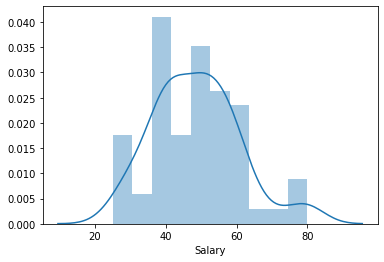

In [45]:
sns.distplot(df['Salary'], bins = 10, kde=True, rug= False);

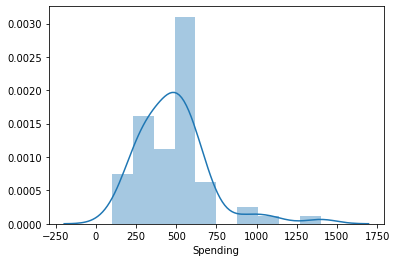

In [46]:
sns.distplot(df['Spending'], bins = 10, kde=True, rug= False);

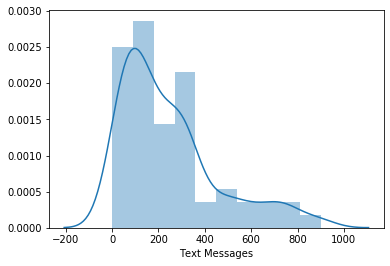

In [47]:
sns.distplot(df['Text Messages'], bins = 10, kde=True, rug= False);

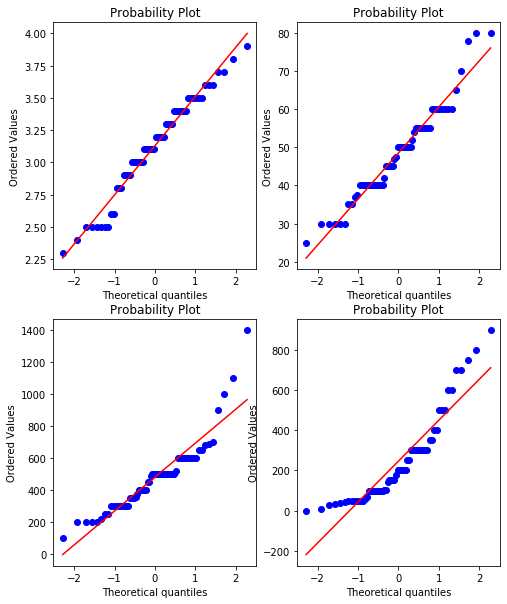

In [48]:
plt.figure(figsize=[8, 10])

plt.subplot(2, 2, 1)
stats.probplot(df['GPA'], plot=plt);


plt.subplot(2, 2, 2)
stats.probplot(df['Salary'], plot=plt);



plt.subplot(2, 2, 3)
stats.probplot(df['Spending'], plot=plt);



plt.subplot(2, 2, 4)
stats.probplot(df['Text Messages'], plot=plt);

plt.show()


skew value of GPA is -0.3146000894506981
skew value of Salary is 0.5347008436225946
skew value of Spending is 1.5859147414045331
skew value of Text Message is 1.2958079731054333


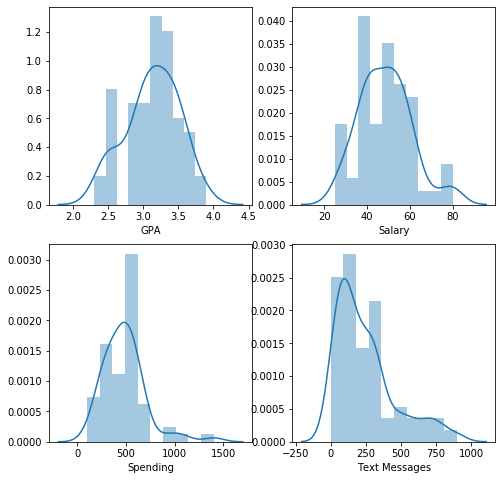

In [49]:
plt.figure(figsize=[8, 8])

plt.subplot(2, 2, 1)
sns.distplot(df['GPA'], bins = 10, kde=True, rug= False);
print('skew value of GPA is', df['GPA'].skew())

plt.subplot(2, 2, 2)
sns.distplot(df['Salary'], bins = 10, kde=True, rug= False);
print('skew value of Salary is', df['Salary'].skew())


plt.subplot(2, 2, 3)
sns.distplot(df['Spending'], bins = 10, kde=True, rug= False);
print('skew value of Spending is', df['Spending'].skew())


plt.subplot(2, 2, 4)
sns.distplot(df['Text Messages'], bins = 10, kde=True, rug= False);
print('skew value of Text Message is', df['Text Messages'].skew())

plt.show()

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from   scipy.stats               import ttest_1samp, ttest_ind
import statsmodels.stats.api as sm

In [5]:
df= pd.read_csv('A+&+B+shingles.csv')

In [6]:
df.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [7]:
df.isnull().sum()

A    0
B    5
dtype: int64

In [8]:
df.shape

(36, 2)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


#### 2.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

###### Define Null and alternate hypothesis for sample A


## step 1:
#### Testing whether the moisture content is less the permissible limit

#### The null hypothesis states that the moisture content of sample A is greater or than equal to the permissible limit, 𝜇 ≥ 0.35

#### The alternative hypothesis states that the moisture content of sample A is less than permissible limit, 𝜇 < 0.35

#### 𝐻0 : 𝜇 ≥ 0.35

#### 𝐻𝐴 : 𝜇 < 0.35

### Step 2: Decide the significance level
#### Here we select 𝛼 = 0.05 as given in the question.

#### Step 3: Identify the test statistic
#### We have two samples (A and B) and we do not know the population standard deviation. Sample sizes for both samples are not the same. The sample size is , n > 30. So we use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic for one sample test for A sample. One tail test for sample A

## Step 4: Calculate the p - value and test statistic

In [17]:
t_statistic, p_value = ttest_1samp(df['A'],0.35, nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value/2)

tstat -1.4735046253382782
P Value 0.07477633144907513


In [18]:
print ("one-sample t-test p-value=", p_value/2)

alpha_level = 0.05

if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the moisture content is greater than permissible limit in sample A.')

one-sample t-test p-value= 0.07477633144907513
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the moisture content is greater than permissible limit in sample A.


### Define Null and alternate hypothesis for sample B
### step 1:
#### Testing whether the moisture content is less the permissible limit

#### The null hypothesis states that the moisture content of sample B is greater or than equal to the permissible limit, 𝜇 ≥ 0.35

#### The alternative hypothesis states that the moisture content of sample B is less than permissible limit, 𝜇 < 0.35

#### 𝐻0 : 𝜇 ≥ 0.35

#### 𝐻𝐴 : 𝜇 < 0.35

### Step 2: Decide the significance level
#### Here we select 𝛼 = 0.05 as given in the question.

#### Step 3: Identify the test statistic
#### We have two samples (A and B) and we do not know the population standard deviation. Sample sizes for both samples are not the same. The sample size is , n > 30. So we use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic for one sample test for B sample. one tail test for Sample B

### Step 4: Calculate the p - value and test statistic

In [20]:
t_statistic, p_value = ttest_1samp(df['B'],0.35, nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value/2)

tstat -3.1003313069986995
P Value 0.0020904774003191826


### Step 5: Decide to reject or accept null hypothesis

In [22]:
print ("one-sample t-test p-value=", p_value/2)

alpha_level = 0.05

if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the moisture content is less than permissible limit in sample B.')
    
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    

one-sample t-test p-value= 0.0020904774003191826
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the moisture content is less than permissible limit in sample B.


## 2.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [25]:
t_statistic, p_value  = ttest_ind(df['A'],df['B'],nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value)

tstat 1.2896282719661123
P Value 0.2017496571835306


In [24]:
print ("one-sample t-test p-value=", p_value/2)

alpha_level = 0.05

if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the moisture content is less than permissible limit in sample B.')
    
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    

one-sample t-test p-value= 0.0020904774003191826
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the moisture content is less than permissible limit in sample B.
